In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('viral_shorts_reels_performance_dataset.csv')

### General dataset info
Print out main metrics

In [3]:
df.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   duration_sec            400 non-null    int64         
 1   hook_strength_score     400 non-null    float64       
 2   niche                   400 non-null    object        
 3   views_first_hour        400 non-null    int64         
 4   views_total             400 non-null    int64         
 5   retention_rate          400 non-null    float64       
 6   first_3_sec_engagement  400 non-null    float64       
 7   music_type              400 non-null    object        
 8   upload_time             400 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 28.3+ KB


In [5]:
df.describe()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,25.085000,0.584850,24730.51000,486338.497500,0.528275,0.617800
std,11.649552,0.229429,14180.99207,291672.505188,0.245214,0.230906
min,5.000000,0.200000,84.00000,1924.000000,0.100000,0.200000
25%,15.000000,0.390000,12497.00000,227904.500000,0.310000,0.420000
50%,26.000000,0.590000,24984.00000,473516.000000,0.530000,0.635000
75%,35.000000,0.770000,36222.25000,745058.750000,0.740000,0.820000
max,44.000000,1.000000,49812.00000,992963.000000,0.950000,0.990000


Check categorical field for missing values


In [7]:
df.niche.value_counts(sort=True, ascending=False)

,count
niche,
Food,50
Tech,48
Music,45
Fitness,41
Gaming,41
Education,40
Comedy,39
Beauty,35
Travel,31


In [8]:
df.music_type.value_counts(sort=True, ascending=False)

,count
music_type,
Original,87
Trending,86
No Music,78
Remix,76
Viral Track,73


In [10]:
"" in list(df.upload_time)

False

The dataset contains 400 records, which is not much for a neural network.

However, the dataset is complete and well-structured. It has neither missing, nor evidently inadequate data in it. This significantly simplifies the preprocessing stage and gives hope for better results.

### Defining Target
The target feature in the given dataset is `views_total` as it describes the resultant performance of the video in question.

One migth consider defining a binary feature `is_viral`, which shows whether the video has pperformed notable better than average. Such feature could also be a target depending on the specification for the model.

### Correlation matrix and heatmap for the numeric features

In [13]:
# Select numeric fields
numeric_df = df.select_dtypes(include=np.number)

In [14]:
# Calculate correlation matrix of numerical columns
corr = numeric_df.corr()

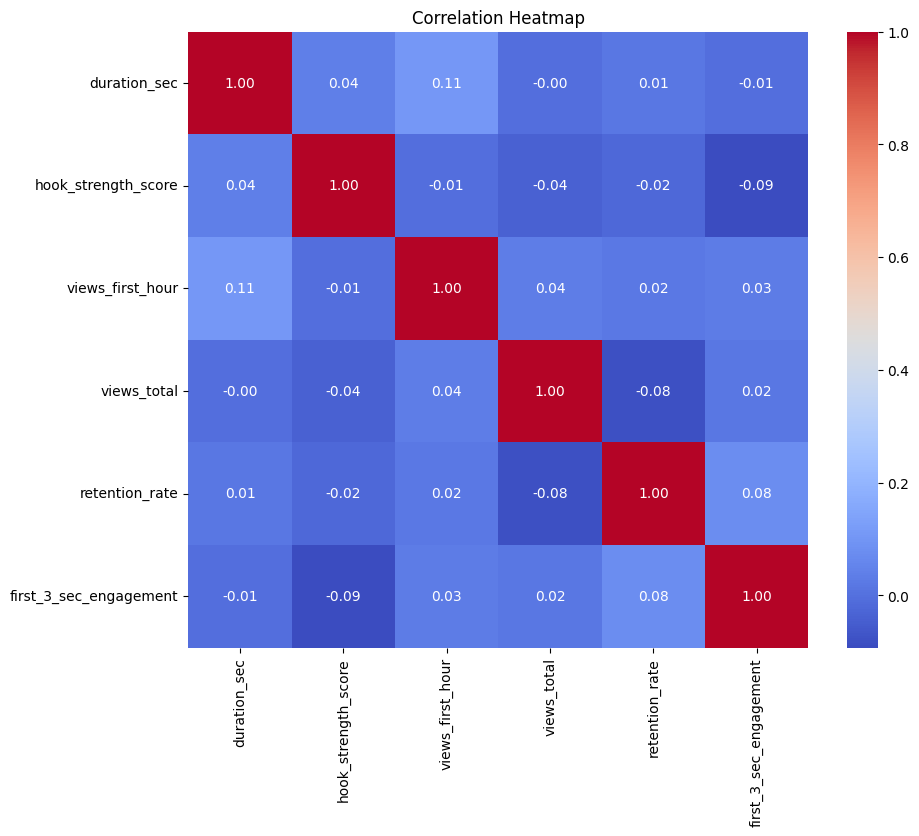

In [16]:
# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The analysis does not highlight strong correlation between any pair of numeric features, emphasising non-linearity of the data and the need for a NN-based model.

### Consider catgorical features

In [17]:
# Select numeric fields
categorical_df = df.select_dtypes(include=object)

In [18]:
categorical_df.nunique()

,0
video_id,400
niche,10
music_type,5
upload_time,239


Drop the `video_id` column, which is an ID column rather than a predictor.

In [20]:
df = df.drop(columns=['video_id'])

All upload dates are in 2024. Let us parse them to datetime.

From the obtained dates, let us extract upload month as the best descriptor of how long each video has been online.

In [25]:
df['upload_time'] = pd.to_datetime(df['upload_time'], format='%Y-%m-%d')

In [28]:
df["upload_month"] = df["upload_time"].dt.month

In [29]:
df.head()

,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time,upload_month
0,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09,2
1,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17,4
2,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01,1
3,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01,4
4,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15,1


Let us plot the distribution of the target with respect to the categorical features.

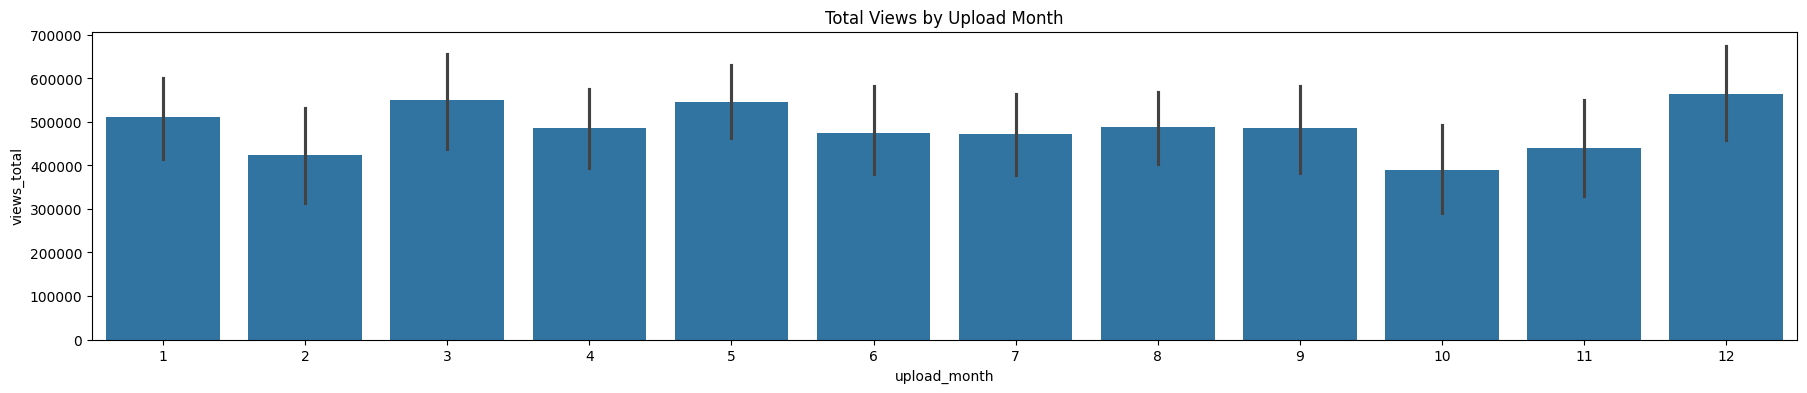

In [30]:
plt.figure(figsize=(22, 4))
sns.barplot(x='upload_month', y='views_total', data=df.sort_values(by='upload_month'))
plt.title('Total Views by Upload Month')
plt.show()

Contrary to what one could expect, this distribution does not suggest any correlation between the number of views and the time since the video was uploaded.

Still, one should keep the feature to account for possible seasonality. However, the aggregated `upload_month` feature is more informative consistent than the exact upload date, so let us keep it instead.

In [31]:
df = df.drop(columns=['upload_time'])

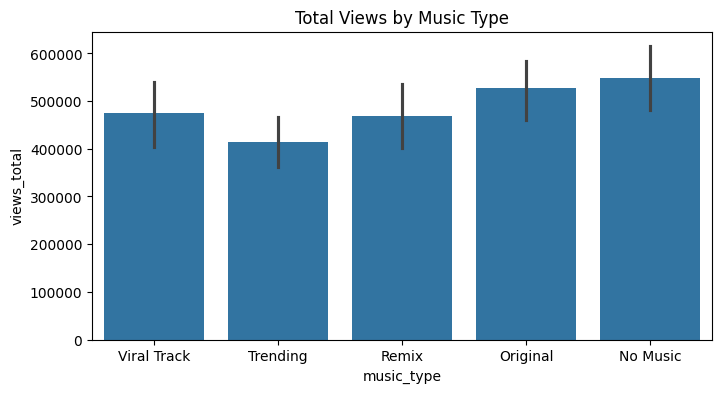

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x='music_type', y='views_total', data=df)
plt.title('Total Views by Music Type')
plt.show()

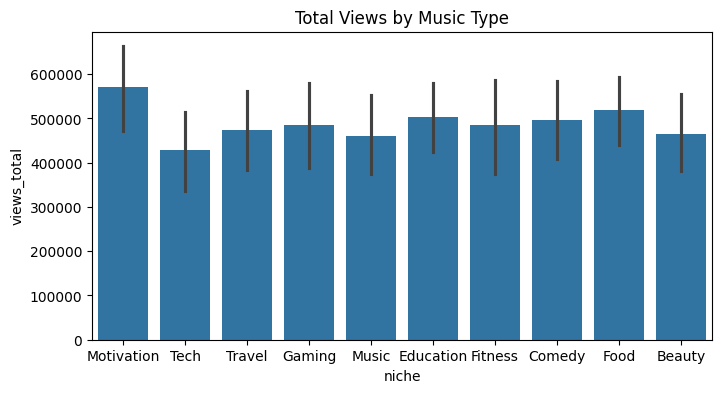

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x='niche', y='views_total', data=df)
plt.title('Total Views by Music Type')
plt.show()

Here we see some dependence of the video's performance on its niche and music attached. These features apper importnant and there is not obvious encoding for them, so we keep them as is and let the NN estimate.

### Move target to the end of the dataframe

In [32]:
df = df[[ col for col in df.columns if col != 'views_total' ] + ['views_total']]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration_sec            400 non-null    int64  
 1   hook_strength_score     400 non-null    float64
 2   niche                   400 non-null    object 
 3   views_first_hour        400 non-null    int64  
 4   retention_rate          400 non-null    float64
 5   first_3_sec_engagement  400 non-null    float64
 6   music_type              400 non-null    object 
 7   upload_month            400 non-null    int32  
 8   views_total             400 non-null    int64  
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 26.7+ KB


### Introduce the Alternative Boolean Target
Let us introduce an alternative target `is_viral` as a flag that the video in question is among 20% most viewed videos in the dataset.

In [35]:
# 80th percentile threshold
q80 = df["views_total"].quantile(0.8)
# Integer flag for "above 80%"
df["above_q80"] = (df["views_total"] > q80).astype(int)

### Result
Now we have a ready dataset with unnecessary fields removed and two targets to choose from at the modelling stage.

In [37]:
df.head(10)

,duration_sec,hook_strength_score,niche,views_first_hour,retention_rate,first_3_sec_engagement,music_type,upload_month,views_total,above_q80
0,16,0.61,Motivation,10695,0.85,0.26,Viral Track,2,886048,1
1,19,0.34,Tech,1812,0.56,0.80,Trending,4,198243,0
2,13,0.47,Travel,23247,0.14,0.27,Trending,1,584171,0
3,36,0.21,Travel,11515,0.29,0.81,Remix,4,491291,0
4,8,0.75,Gaming,13474,0.27,0.44,Viral Track,1,607425,0
5,39,0.67,Music,28571,0.31,0.86,Original,5,852452,1
6,42,0.70,Tech,4581,0.12,0.70,Remix,7,133821,0
7,37,0.35,Gaming,9520,0.86,0.50,Trending,8,801149,1
8,37,0.47,Music,21931,0.50,0.43,Viral Track,12,820992,1
9,32,0.59,Motivation,30434,0.88,0.60,Viral Track,11,911686,1


In [40]:
# Export the resulting dataset to CSV
df.to_csv('application/data.csv')